In [2]:
import perceval as pcvl
import numpy as np
from perceval.algorithm import Sampler
from perceval.components.unitary_components import PS, BS, PERM

[Parameter(name='theta_val', value=None, min_v=0.0, max_v=12.566370614359172)]


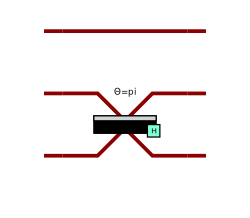

In [28]:
def initialize_processor(old_result=None, new_data_normalized=None, num_ancillas=1, N=None):
    assert 0 <= new_data_normalized <= 1 
    if new_data_normalized is None:
        new_data_normalized = 0.5
    if old_result is None:
        assert N is not None
        old_result = [1 for _ in range(N)]
    
    processor = pcvl.Processor("SLOS", len(old_result) + 2*num_ancillas)
    processor.with_input(pcvl.BasicState(old_result + num_ancillas*[1, 0]))
    processor.add(len(old_result), BS.H(theta=np.pi*new_data_normalized))
    print(BS(theta=pcvl.P('theta_val')).get_parameters())
    return processor

p = initialize_processor([2], 1, 1)
pcvl.pdisplay(p)






[Parameter(name='theta_val', value=None, min_v=0.0, max_v=12.566370614359172)]
